# Zip code analysis

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/cleaned.csv')

In [3]:
X = pd.get_dummies(df.zipcode, drop_first=False)
y = df.price.apply(np.log10)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


In [5]:
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     282.1
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:57:17   Log-Likelihood:                 7475.0
No. Observations:               17277   AIC:                        -1.481e+04
Df Residuals:                   17207   BIC:                        -1.427e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
98001          5.4290      0.009    580.593      0.000       5.411       5.447
98002          5.3618      0.013    418.845      0.000       5.337       5.387
98003          5.4467      0.011    513.569      0.000       5.426       5.467
98004          6.0706      0.010    608.952      0.000       6.051       6.090
98005          5.8928      0.013    436.863      0.000       5.866       5.919
98006          5.8838      0.008    732.954      0.000       5.868       5.900
98007          5.7748      0.015    390.241      0.000       5.746       5.804
98008          5.7691      0.010    557.407      0.000       5.749       5.789
98010          5.5778      0.017    324.983      0.000       5.544       5.611
98011          5.6823      0.013    445.352      0.000       5.657       5.707
98014          5.6035      0.015    368.473      0.000       5.574       5.633
98019          5.6093      0.013    436.723      0.000       5.584       5.634
98022          5.4682      0.012    472.812      0.000       5.446       5.491
98023          5.4319      0.008    700.893      0.000       5.417       5.447
98024          5.7018      0.019    303.260      0.000       5.665       5.739
98027          5.7546      0.008    678.498      0.000       5.738       5.771
98028          5.6428      0.011    536.872      0.000       5.622       5.663
98029          5.7626      0.010    583.835      0.000       5.743       5.782
98030          5.4606      0.011    488.454      0.000       5.439       5.482
98031          5.4692      0.011    520.356      0.000       5.449       5.490
98032          5.3848      0.016    342.316      0.000       5.354       5.416
98033          5.8567      0.009    679.406      0.000       5.840       5.874
98034          5.6815      0.007    771.255      0.000       5.667       5.696
98038          5.5407      0.007    757.902      0.000       5.526       5.555
98039          6.3082      0.024    266.001      0.000       6.262       6.355
98040          6.0439      0.010    576.321      0.000       6.023       6.064
98042          5.4690      0.008    725.120      0.000       5.454       5.484
98045          5.6084      0.011    490.146      0.000       5.586       5.631
98052          5.7889      0.007    789.277      0.000       5.775       5.803
98053          5.8030      0.009    650.558      0.000       5.785       5.820
98055          5.4668      0.010    521.291      0.000       5.446       5.487
98056          5.5813      0.009    637.661      0.000       5.564       5.598
98058          5.5206      0.008    658.431      0.000       5.504       5.537
98059          5.6595      0.008    692.982      0.000       5.644       5.676
98065          5.7082      0.010    566.822      0.000       5.688       5.728
98070          5.6639      0.016    343.471      0.000       5.632       5.696
98

In [7]:
zips = model.params.reset_index()
zips.columns = ['zip_code', 'mean_log_price']

In [8]:
quartiles = zips.mean_log_price.quantile(q=[0.25, 0.5, 0.75])

array([[<AxesSubplot:title={'center':'zip_code'}>,
        <AxesSubplot:title={'center':'mean_log_price'}>]], dtype=object)

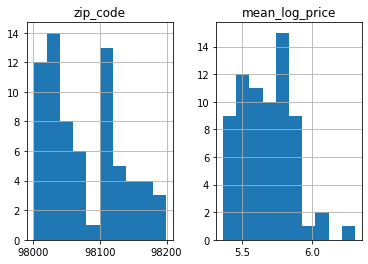

In [35]:
def get_quartile(value)